Comprobaciones previas del collab

##### Advertencia: este notebook es una recopilacion/guia del trabajo realizado en el modelo final, se muestra el proceso realizado paso a paso, pero por motivos de rendimiento el numero de epocas se ha reducido a 10. en caso de uso elevar el numero de replicas a 100 como se usa en el modelo original.

In [2]:
#Observo el entorno
!nvidia-smi

Mon Feb 17 15:37:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
#instalo ultralytics en el collab
!pip install ultralytics

In [4]:
#hago los check de la maquina virtual para ver su potencia
import ultralytics
ultralytics.checks()

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.4/112.6 GB disk)


In [5]:
#importo yolo
from ultralytics import YOLO
from IPython.display import Image

In [6]:
#importo la libreria
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KwEwzKgU4TML4BZUrgNJ")
project = rf.workspace("workenv-dayet").project("facial-emotion-dataset-7g1jd-hipbk")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [8]:
#Observo donde ha instalado el dataset
dataset.location

'/content/Facial-Emotion-Dataset--3'

In [9]:
#Entreno el modelo
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 92.5MB/s]
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Facial-Emotion-Dataset--3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

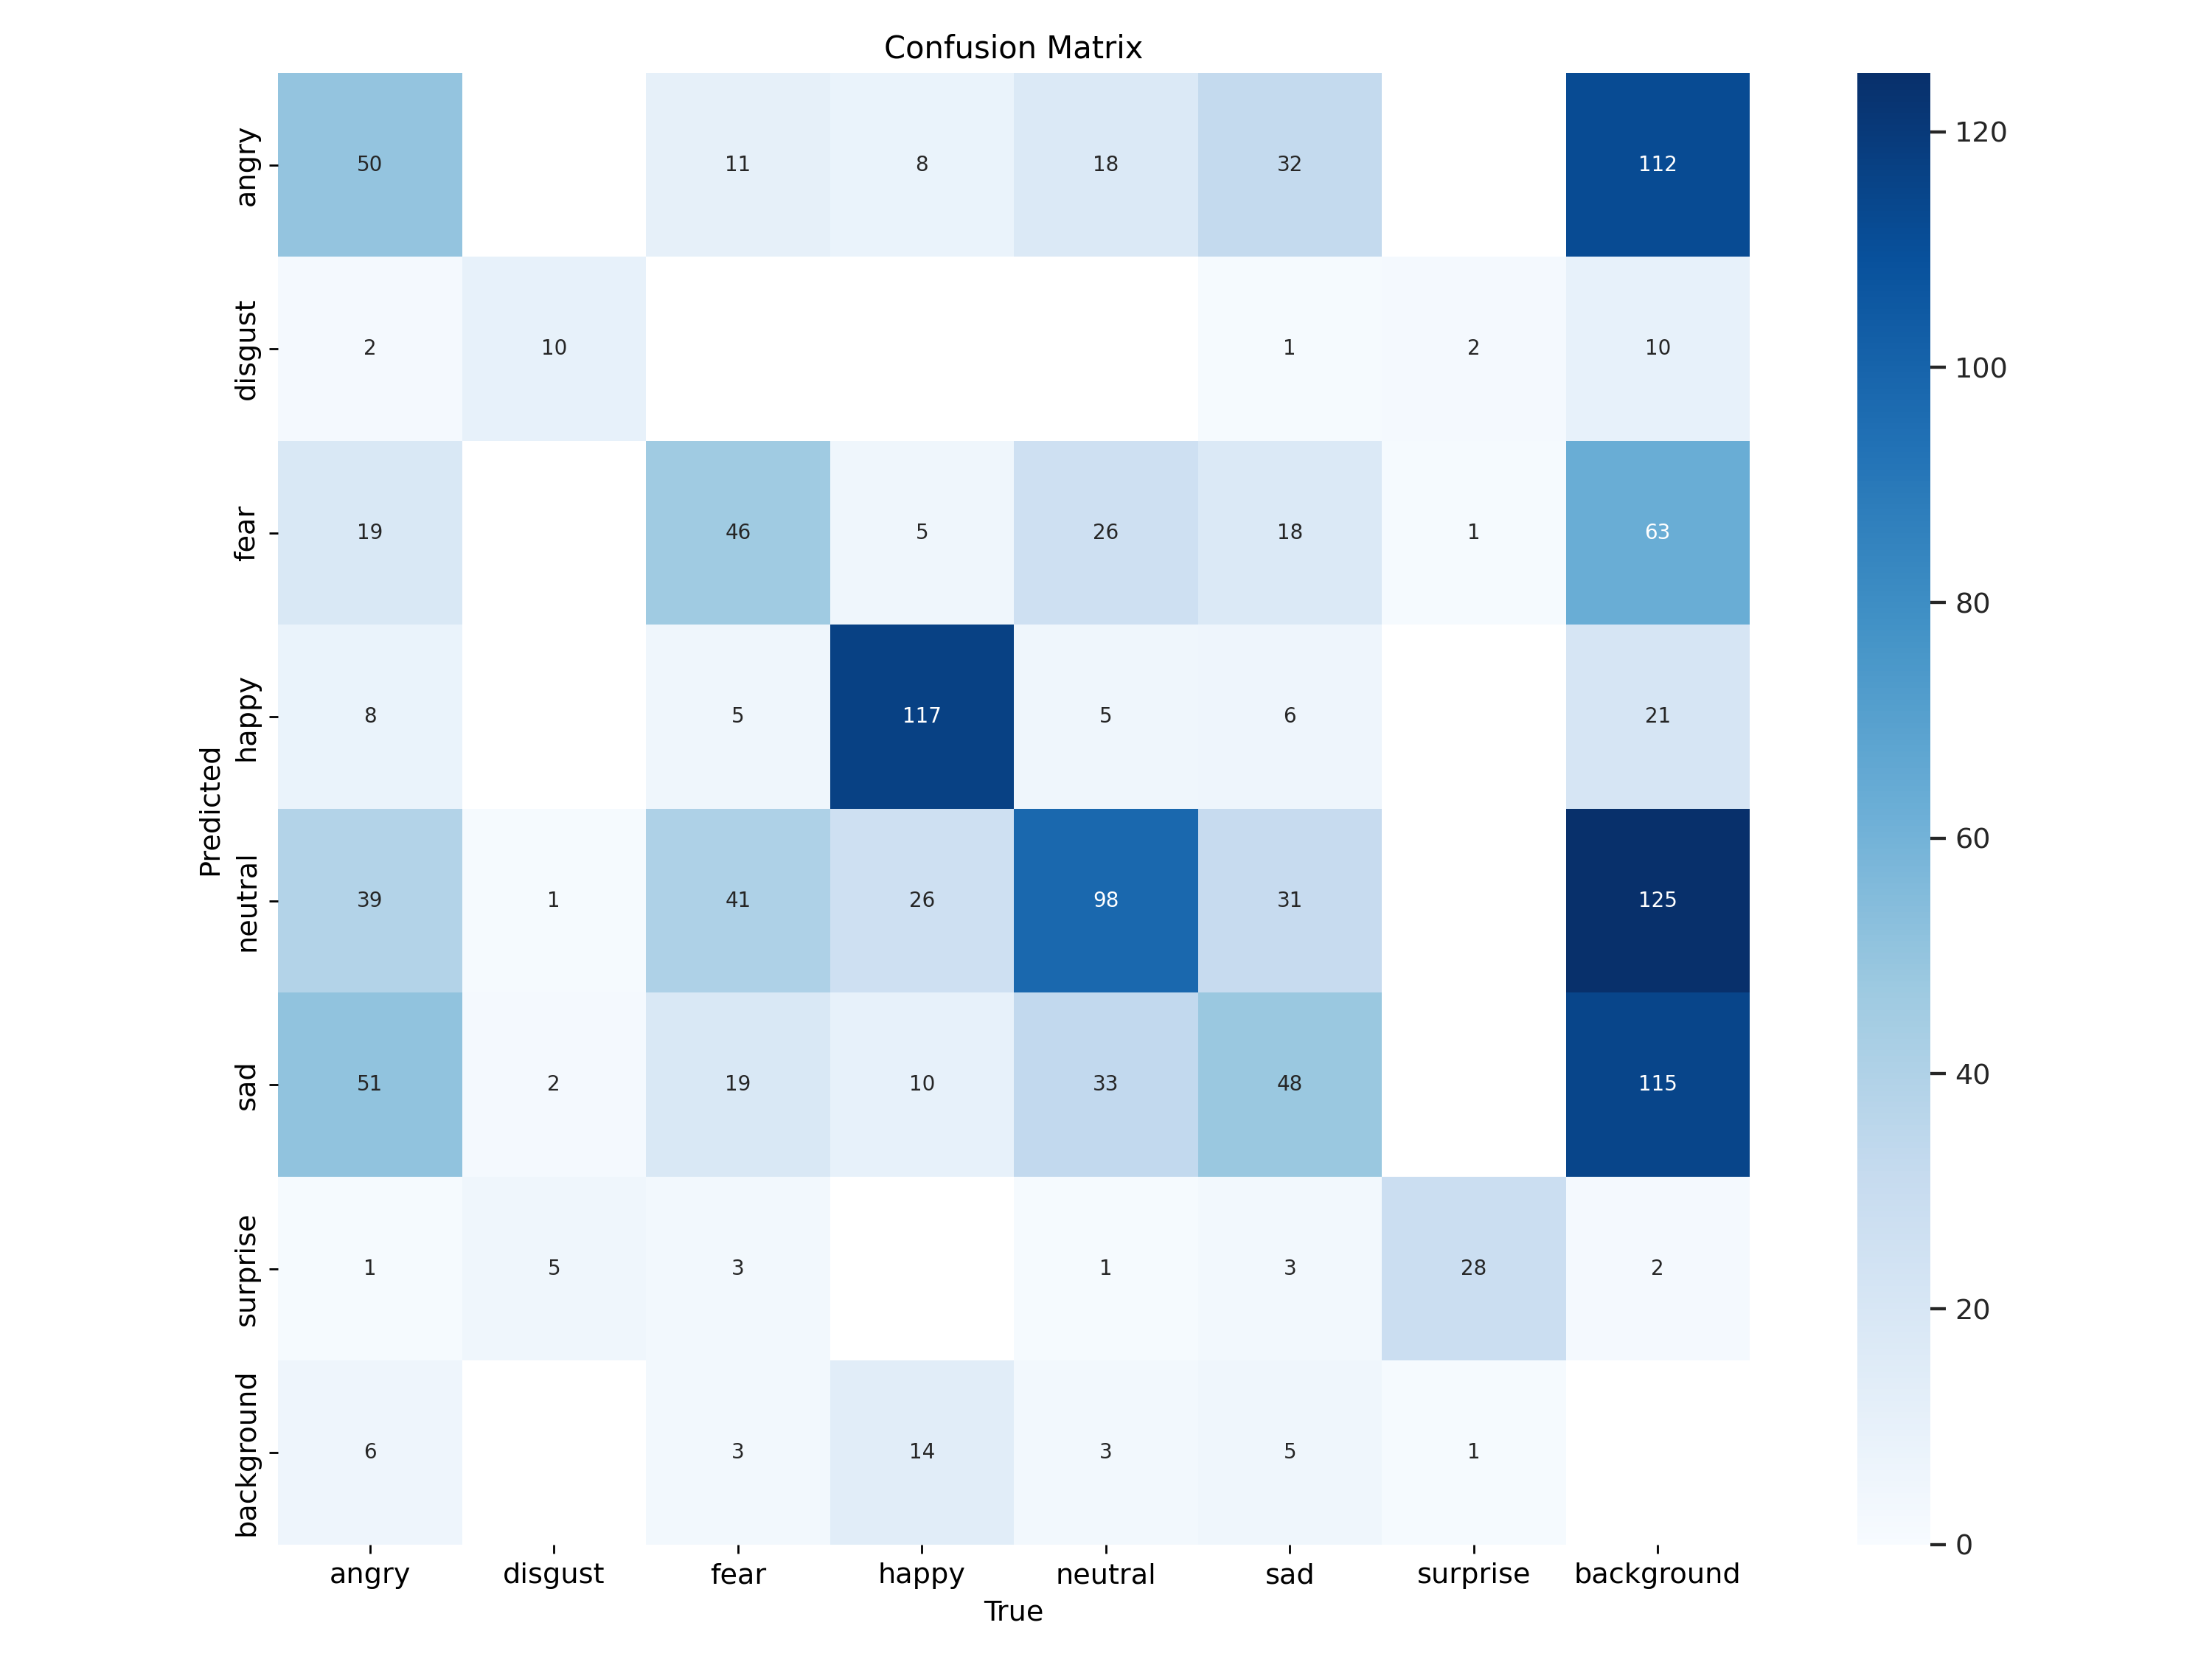

In [11]:
#examino los resultados
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

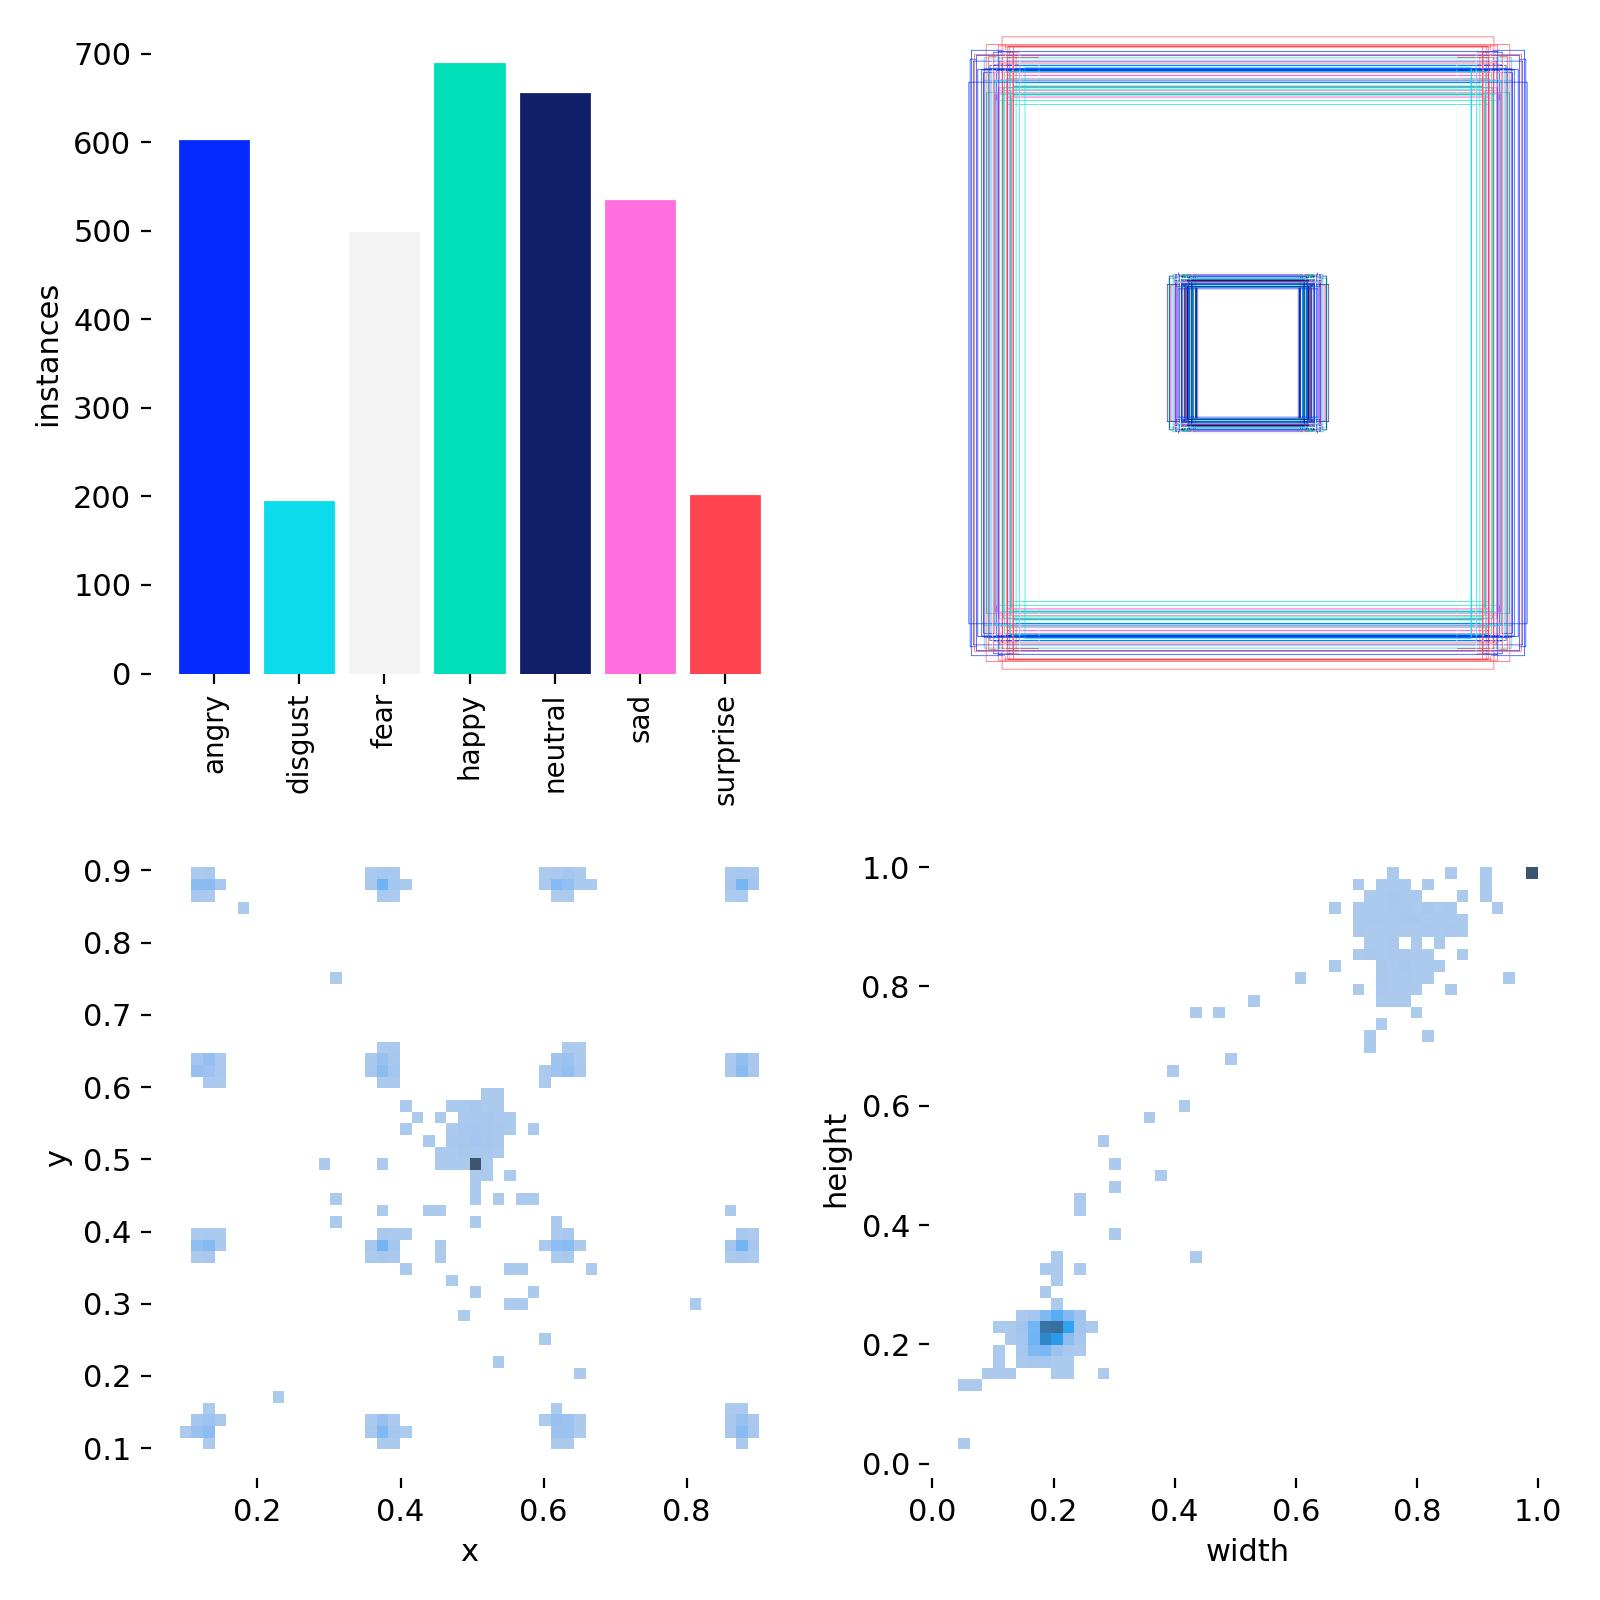

In [12]:
Image("/content/runs/detect/train/labels.jpg", width=600)

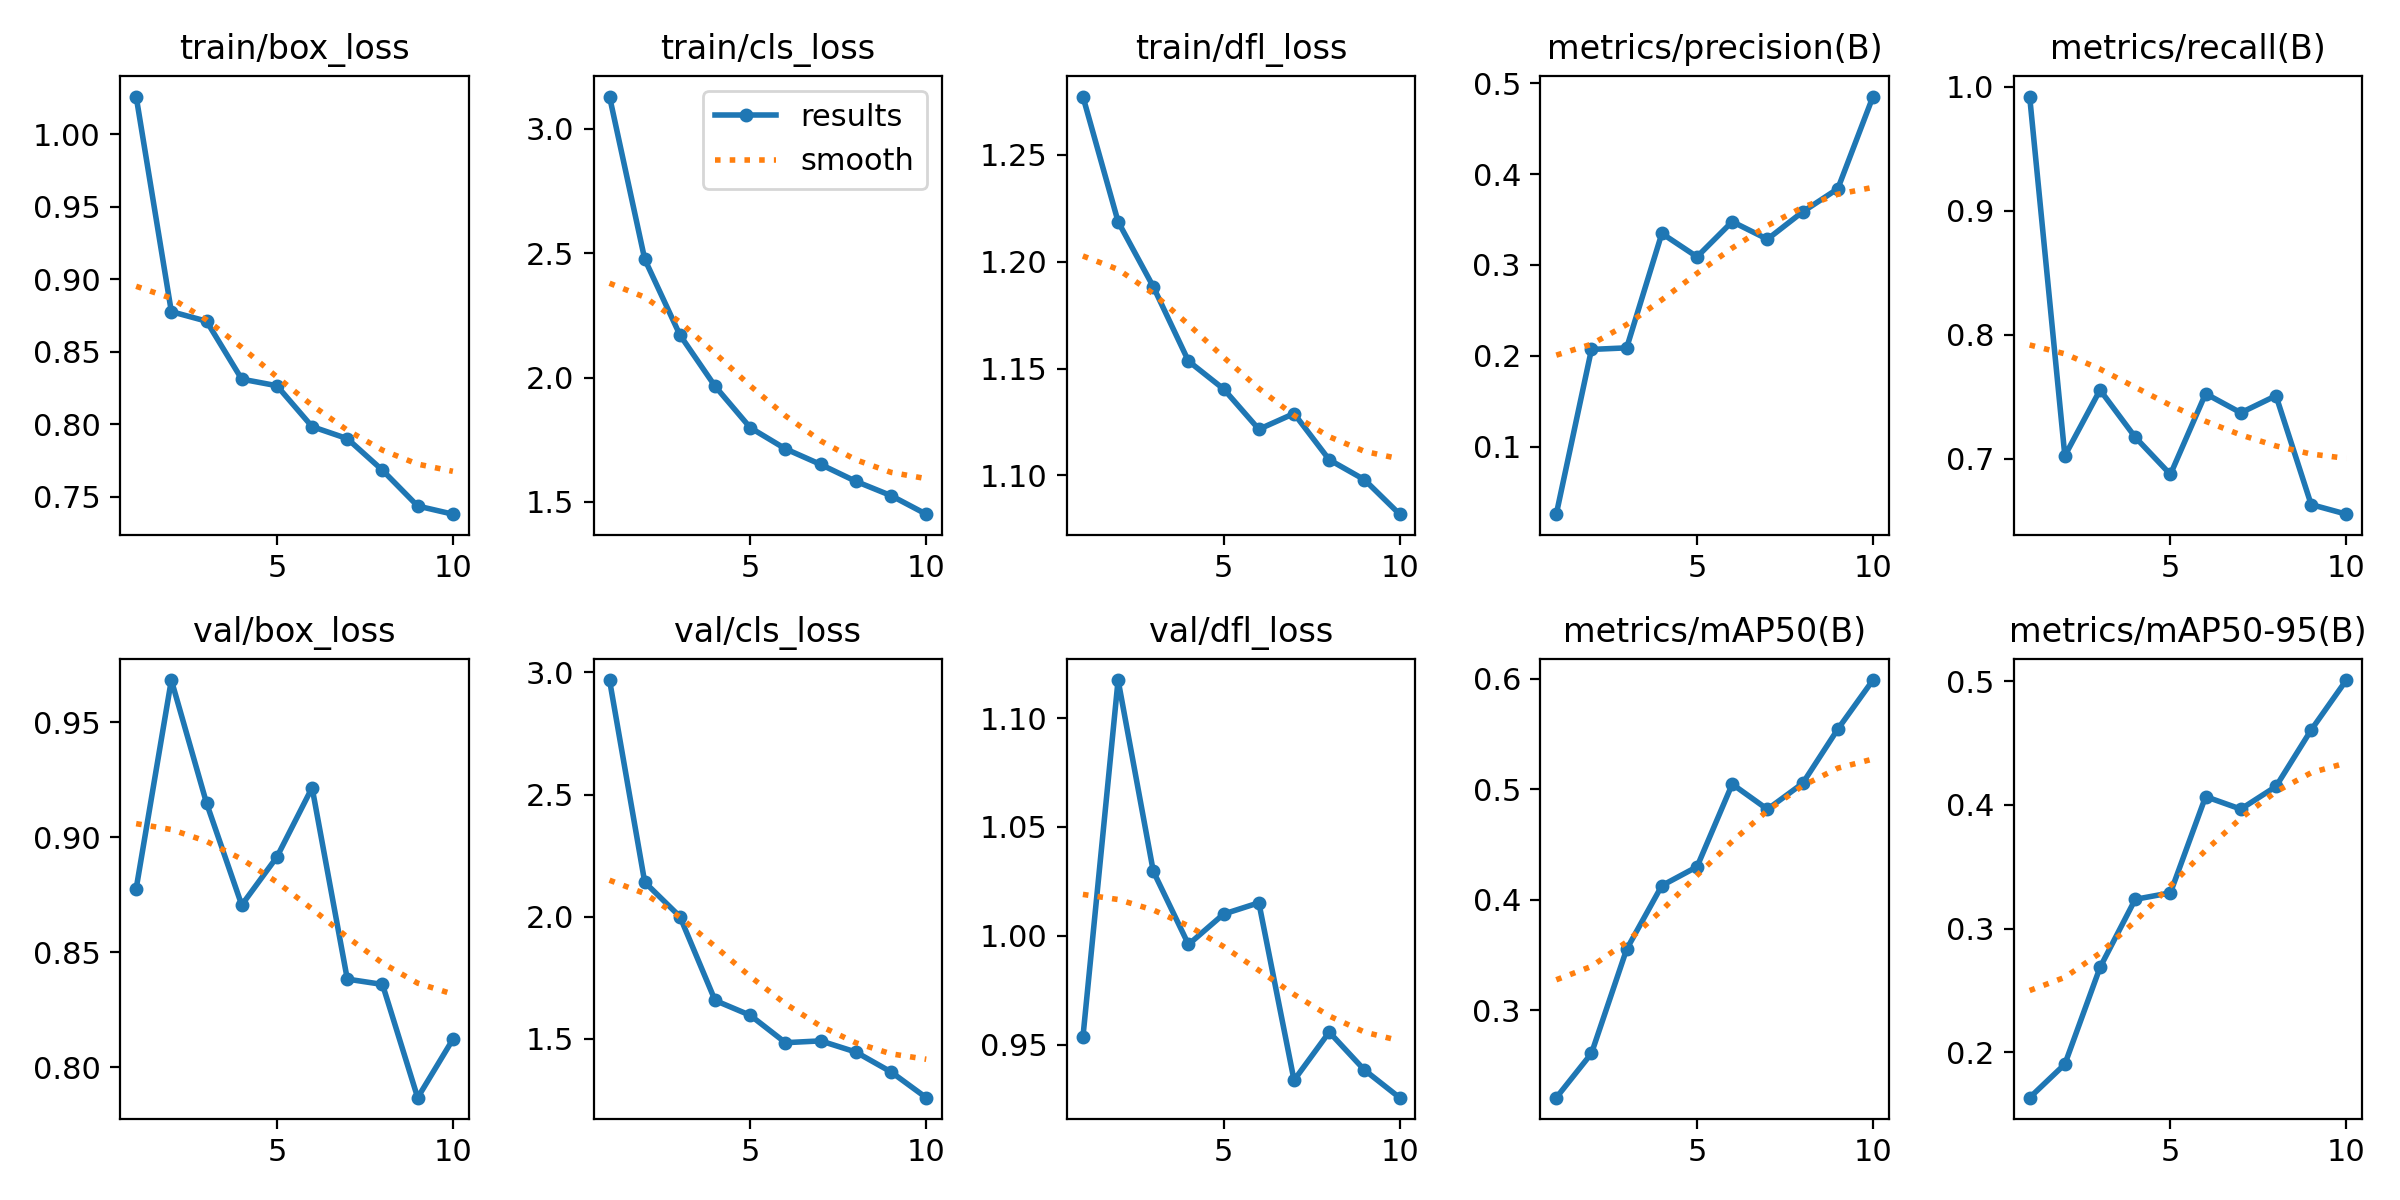

In [13]:
Image("/content/runs/detect/train/results.png", width=600)

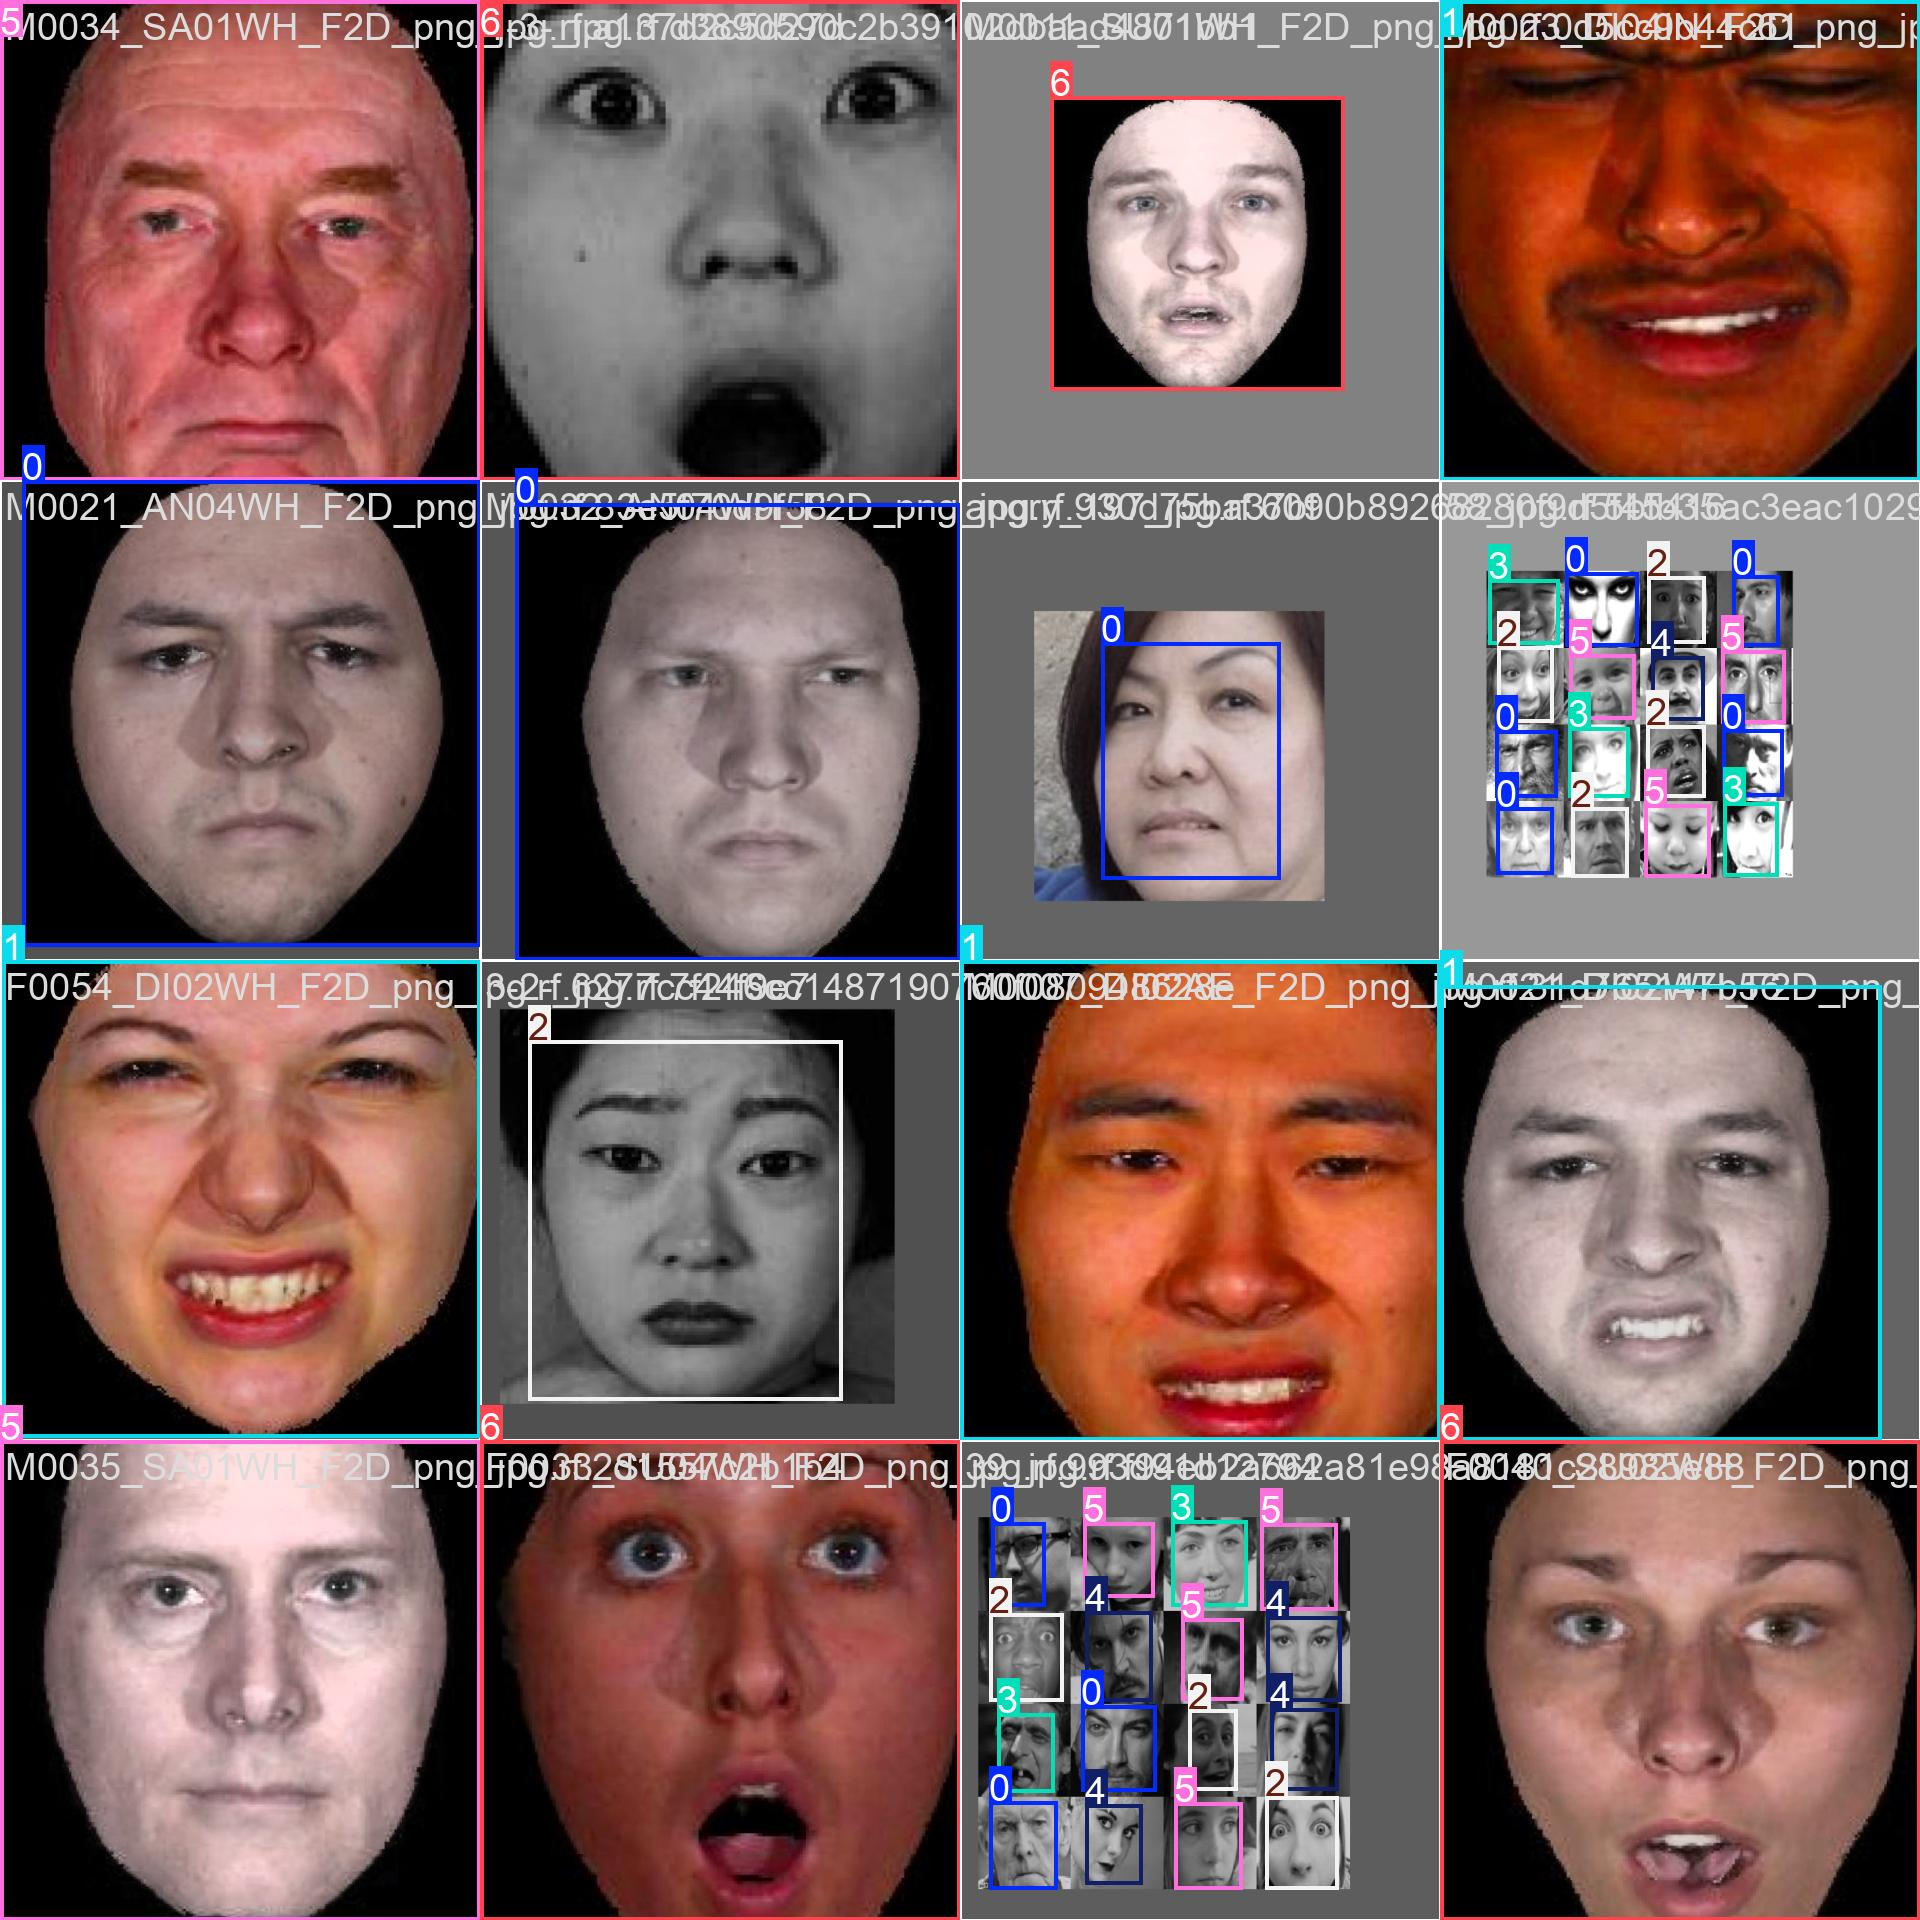

In [14]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

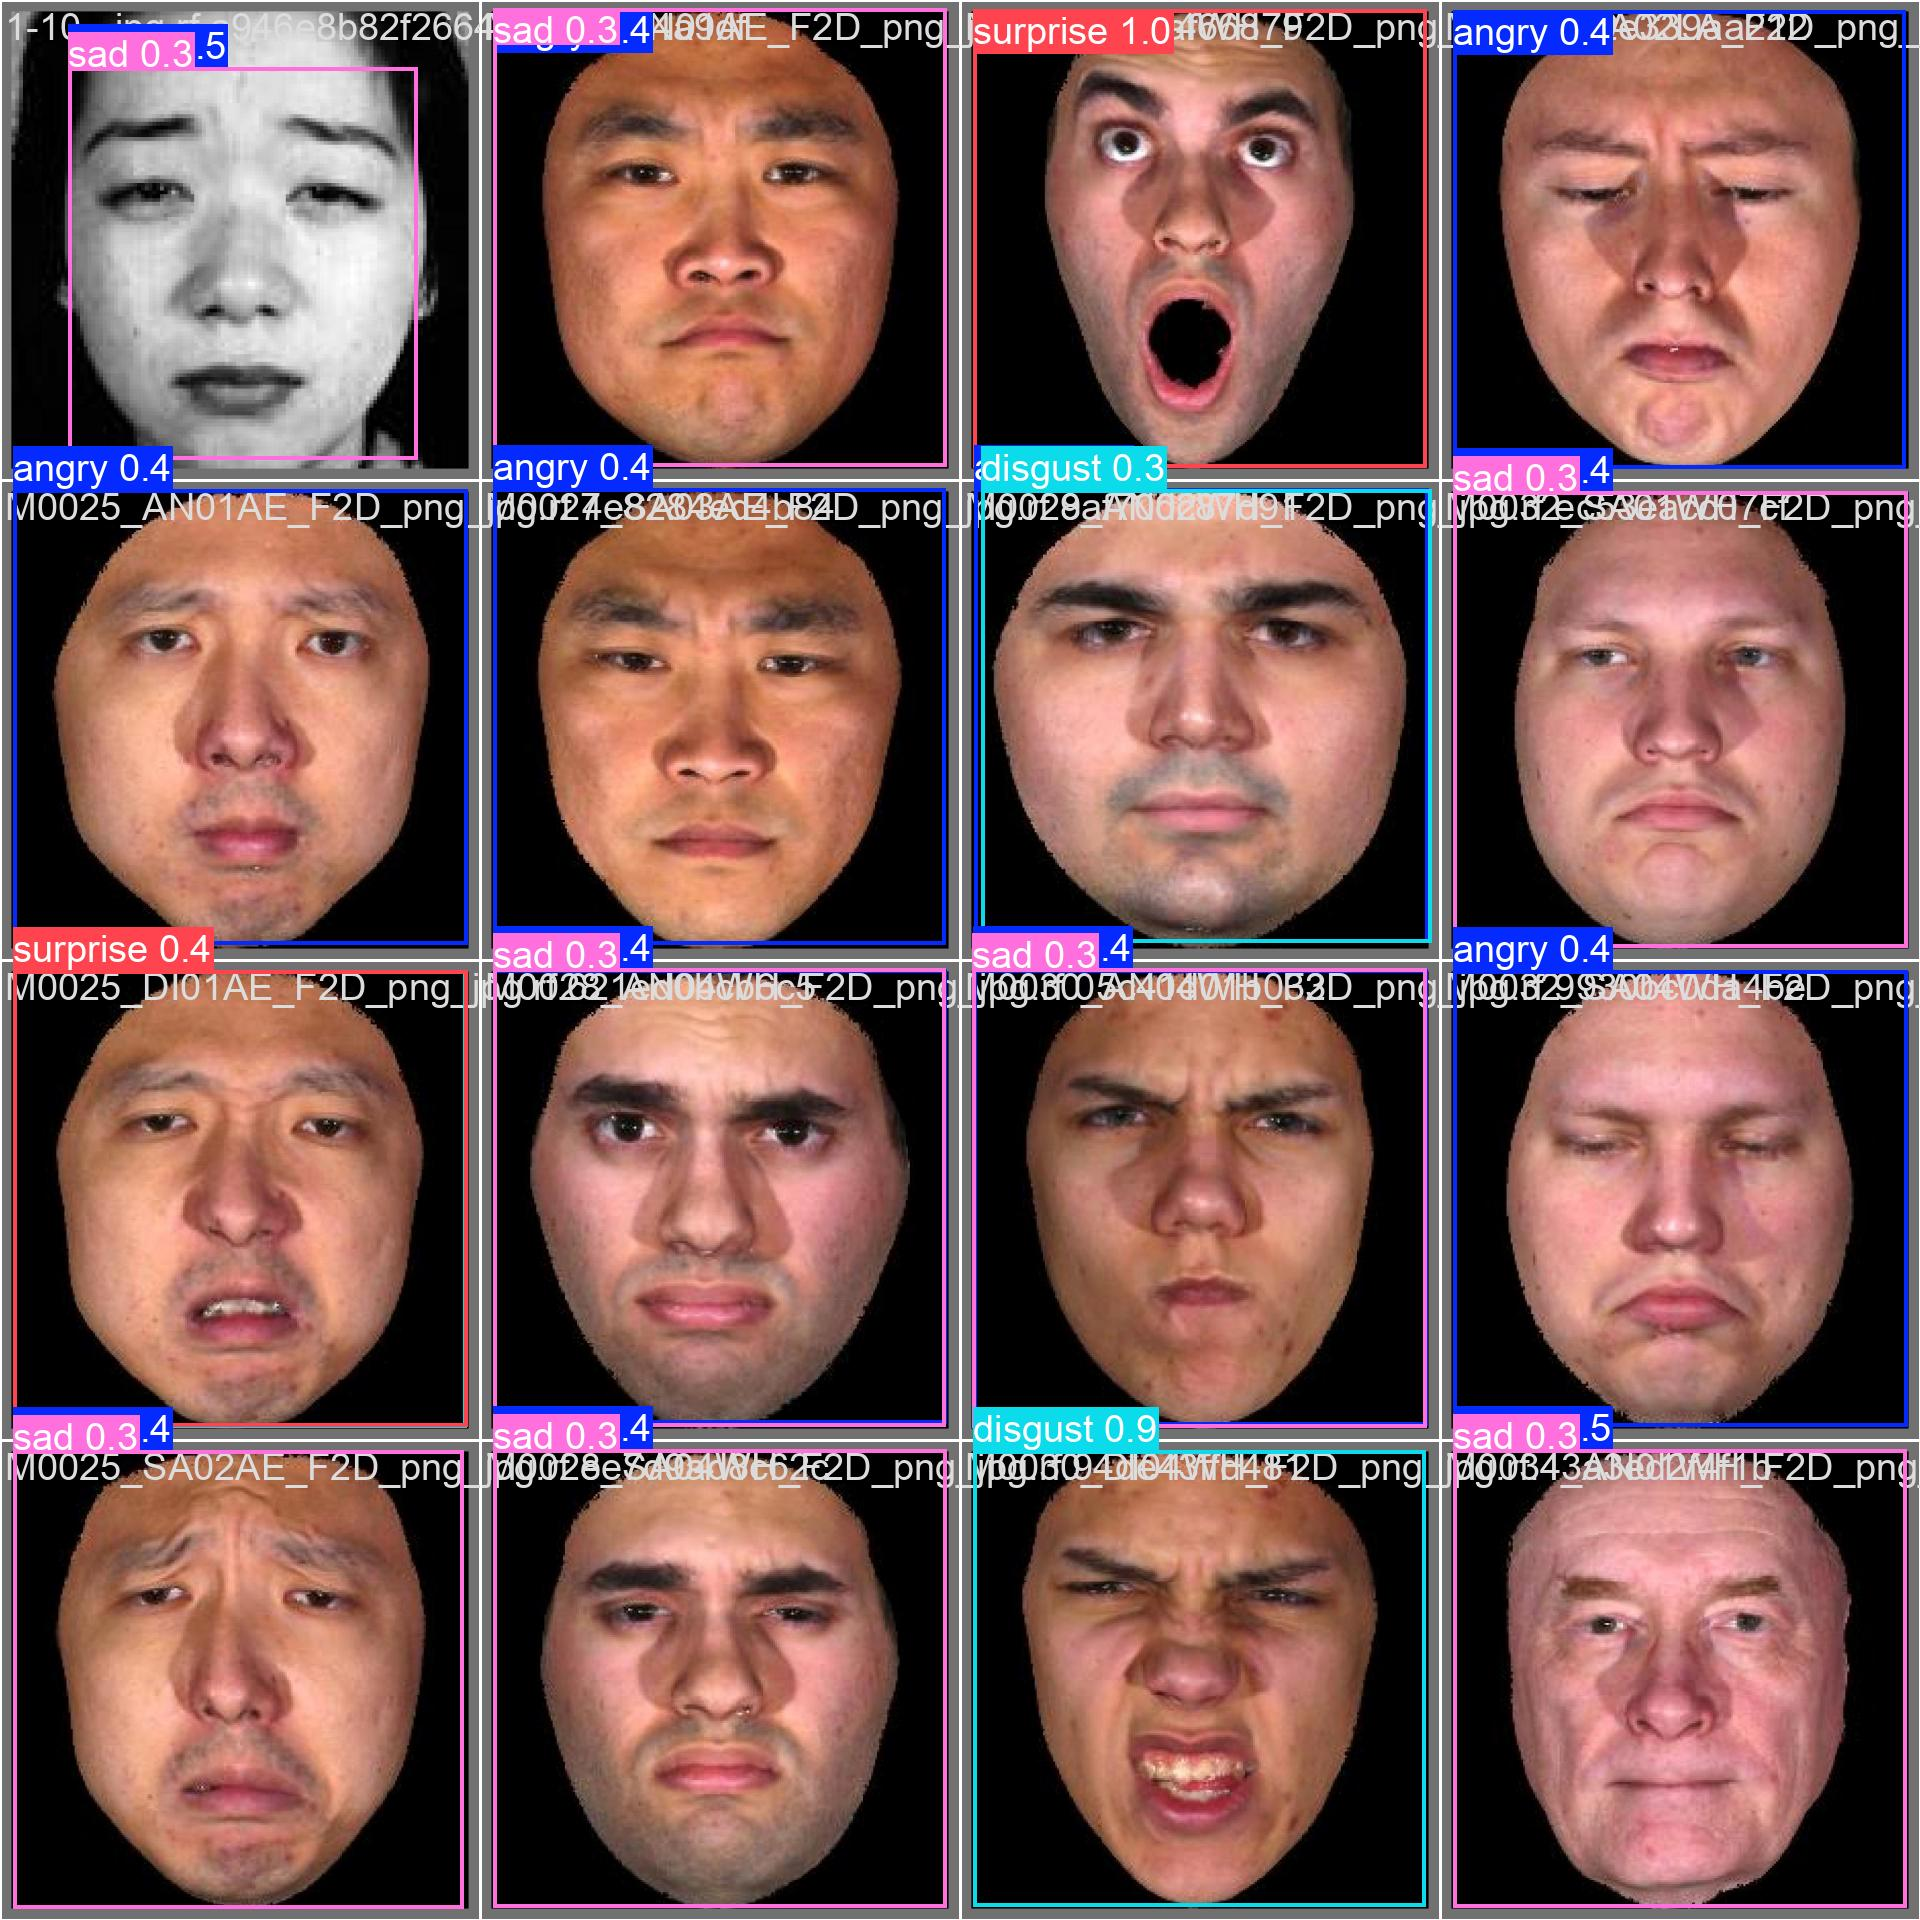

In [15]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

In [16]:
#Validamos y Fine-Tuned Model
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100% 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:03<00:00,  3.74it/s]
                   all        185        862      0.485      0.655      0.599      0.501
                 angry         76        176      0.384      0.489      0.441      0.325
               disgust         18         18      0.564      0.778      0.808      0.805
                  fear         51        128       0.37      0.508      0.499       0.37
                 happy         64        180      0.744      0.667      0.794      0.568
               neutral         52        184      0.388      0.739      0.462      0.334
                   sad         64   

In [17]:
#Inferencia
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/99 /content/Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg: 640x640 1 angry, 12.4ms
image 2/99 /content/Facial-Emotion-Dataset--3/test/images/1-7-_jpg.rf.e66429ccfa57cb2c03c5e06fe43e3a8b.jpg: 640x640 1 angry, 1 fear, 1 sad, 8.5ms
image 3/99 /content/Facial-Emotion-Dataset--3/test/images/1-8-_jpg.rf.d4579ef9e8b6ca750aa61bd65ff33b47.jpg: 640x640 1 angry, 1 disgust, 8.2ms
image 4/99 /content/Facial-Emotion-Dataset--3/test/images/10_jpg.rf.ce00a096968d9ce9ceb0a85b39e601cb.jpg: 640x640 5 fears, 4 happys, 6 neutrals, 2 sads, 7.9ms
image 5/99 /content/Facial-Emotion-Dataset--3/test/images/14_jpg.rf.26f69d5d4bfeffe1665b1558c11f95e9.jpg: 640x640 5 angrys, 8 fears, 2 happys, 8 neutrals, 2 sads, 8.1ms
image 6/99 /content/Facial-Emotion-Dataset--3/test/images/2-3-_jpg.rf.2d5cb265aa6d734e

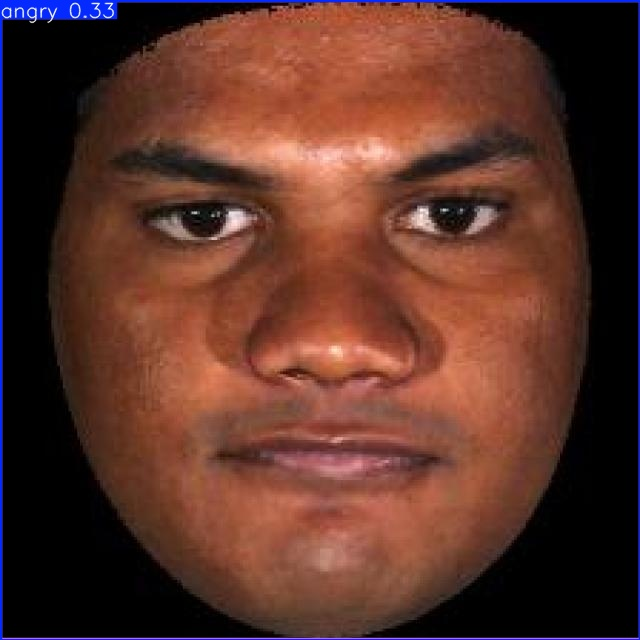

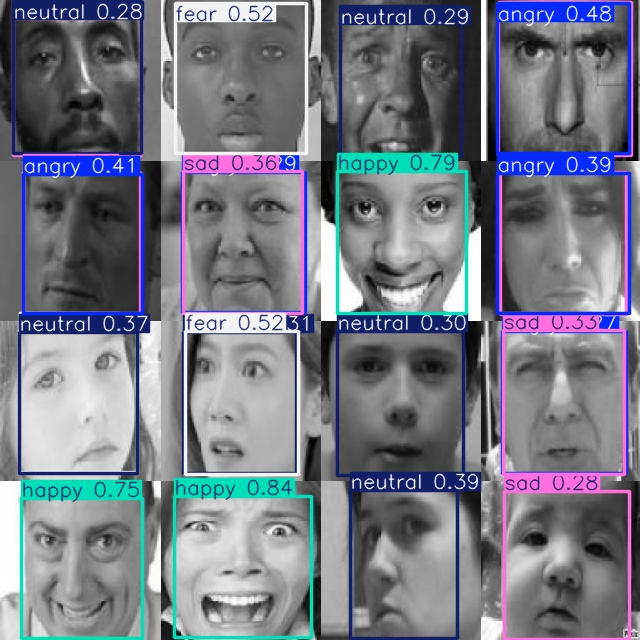

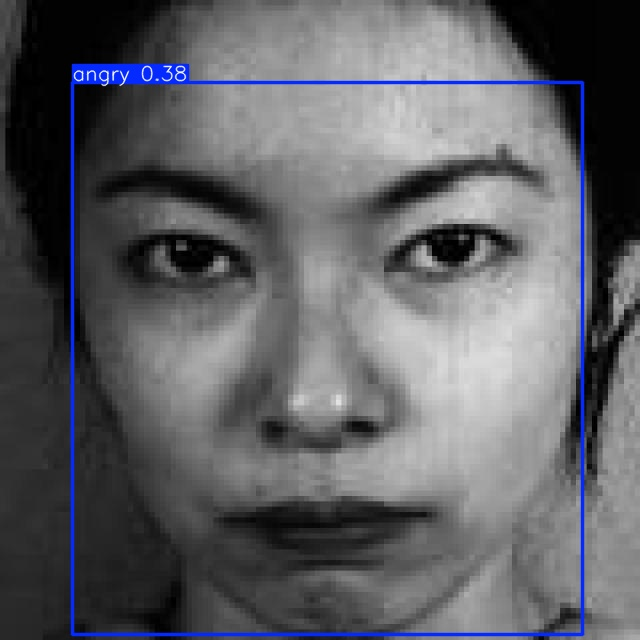

In [18]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")